In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('FastagFraudDetection.csv')

In [ ]:
data.head()

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


# Data Exploration

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [ ]:
data.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [ ]:
data.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

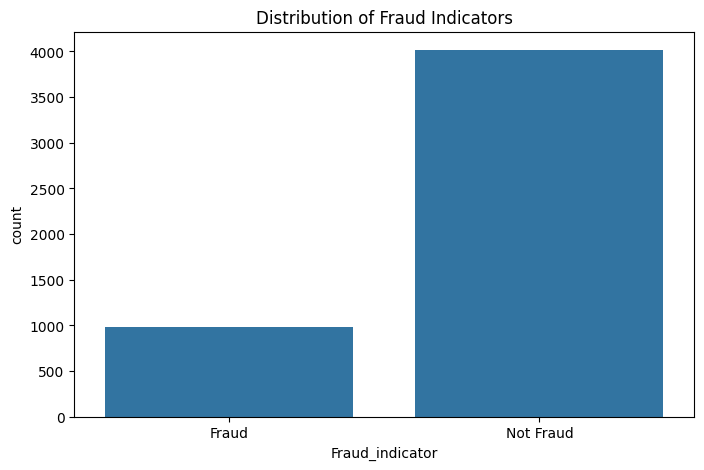

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Fraud_indicator', data=data)
plt.title('Distribution of Fraud Indicators')
plt.show()

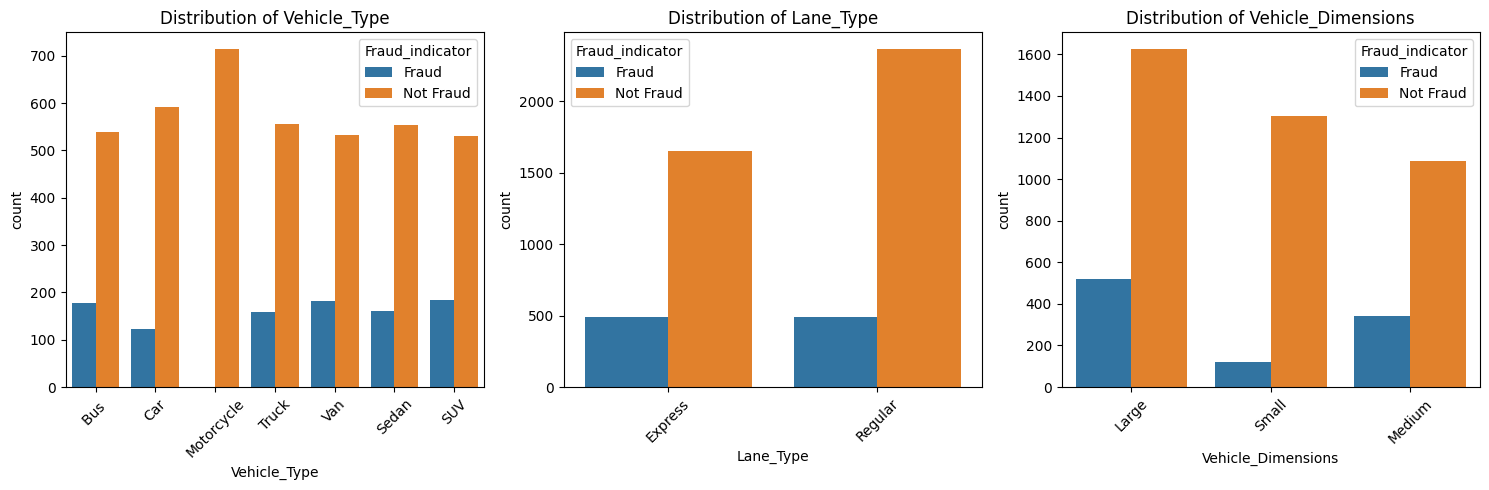

In [ ]:
categorical_features = ['Vehicle_Type', 'Lane_Type', 'Vehicle_Dimensions']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=feature, data=data, hue='Fraud_indicator')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

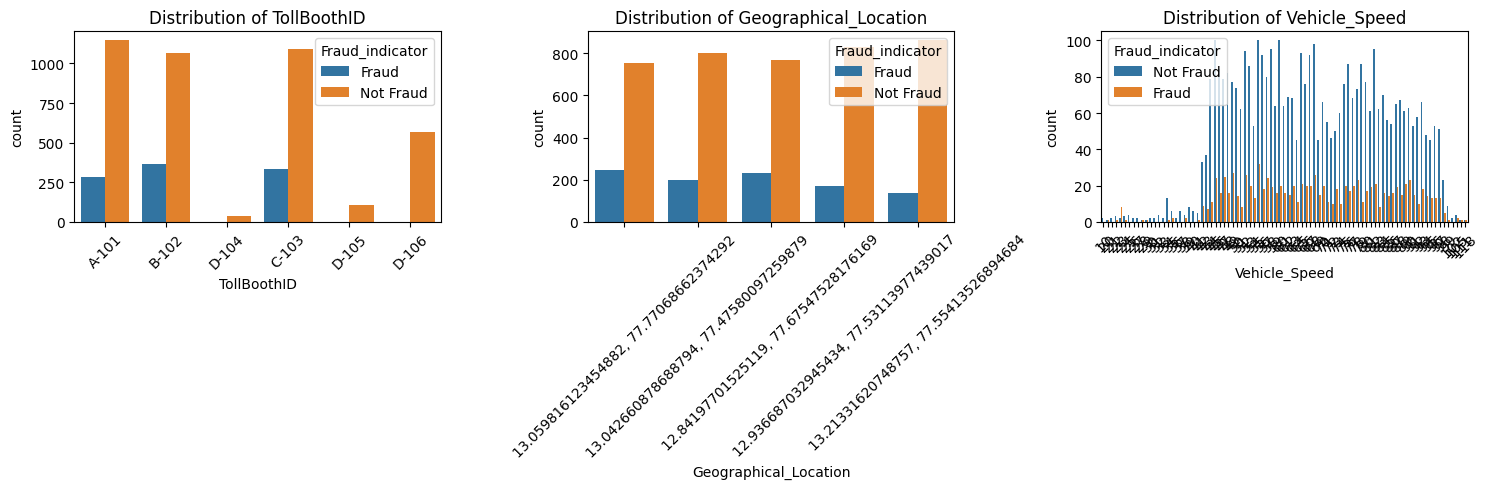

In [ ]:
categorical_features = ['TollBoothID', 'Geographical_Location','Vehicle_Speed']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=feature, data=data, hue='Fraud_indicator')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

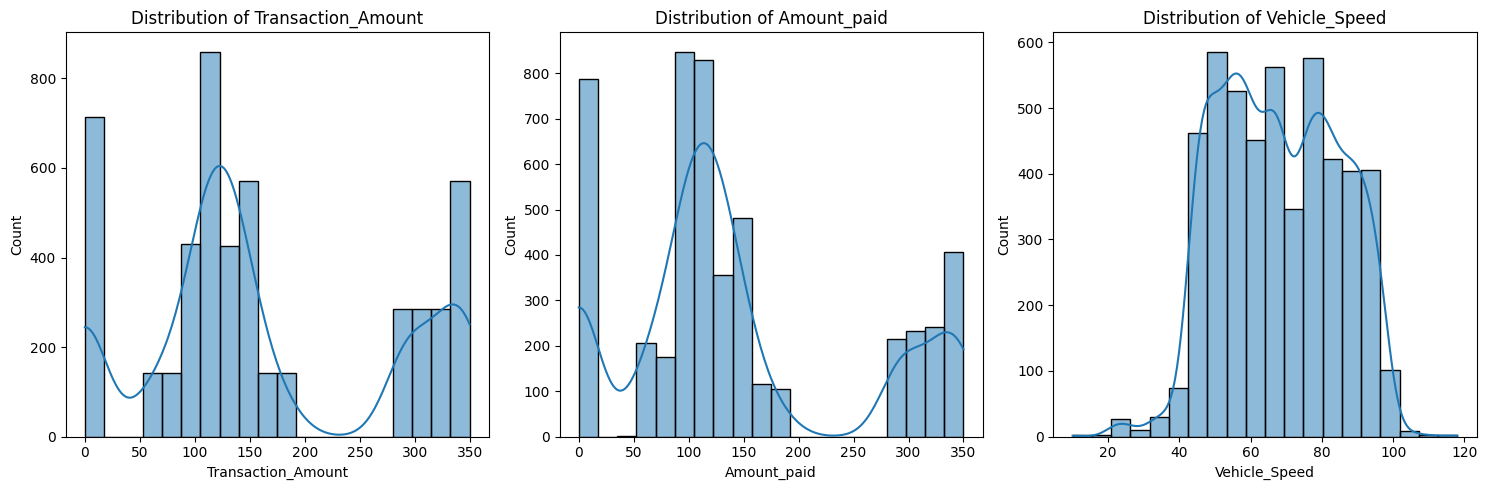

In [ ]:
numerical_features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Fraud_indicator'] = label_encoder.fit_transform(data['Fraud_indicator'])

# Feature Engineering

In [ ]:
data['Amount_Difference'] = data['Transaction_Amount'] - data['Amount_paid']

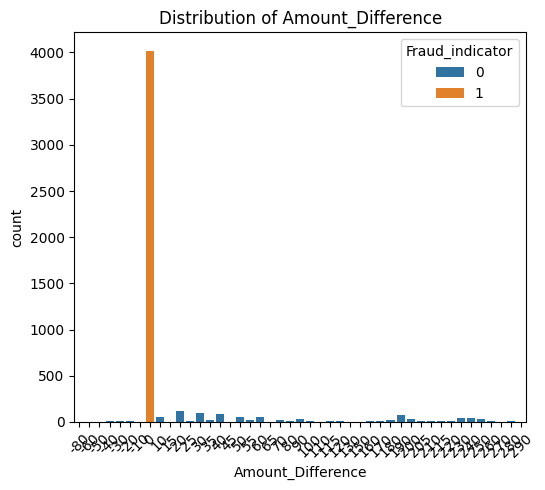

In [ ]:
categorical_features = ['Amount_Difference']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=feature, data=data, hue='Fraud_indicator')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Model Development

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
data = data.drop(columns=['Transaction_ID', 'Vehicle_Plate_Number', 'Timestamp','Vehicle_Type','FastagID','TollBoothID','Lane_Type','Vehicle_Dimensions','Geographical_Location','Vehicle_Speed','Vehicle_Plate_Number'])
data.head()

,Transaction_Amount,Amount_paid,Fraud_indicator,Amount_Difference
0,350,120,0,230
1,120,100,0,20
2,0,0,1,0
3,350,120,0,230
4,140,100,0,40


In [ ]:
data = data.dropna()

In [ ]:
X = data.drop(columns=['Fraud_indicator'])
y = data['Fraud_indicator']
print(X.head())
print(y.head())

   Transaction_Amount  Amount_paid  Amount_Difference
0                 350          120                230
1                 120          100                 20
2                   0            0                  0
3                 350          120                230
4                 140          100                 40
0    0
1    0
2    1
3    0
4    0
Name: Fraud_indicator, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

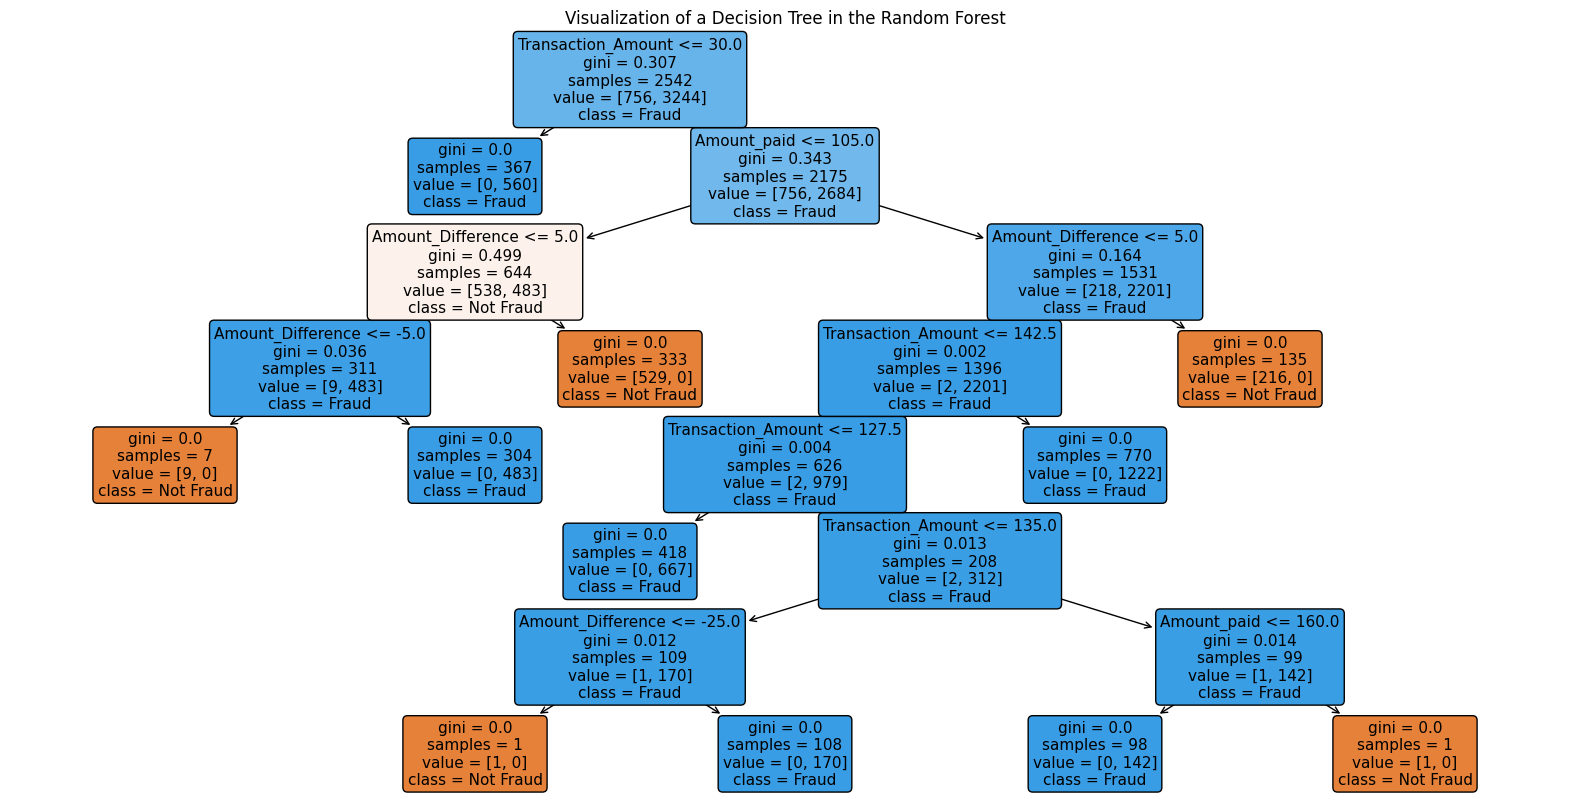

In [ ]:
from sklearn.tree import plot_tree
tree_to_visualize = model.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(tree_to_visualize, feature_names=X_train.columns, class_names=['Not Fraud', 'Fraud'], filled=True, rounded=True)
plt.title('Visualization of a Decision Tree in the Random Forest')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f'Accuracy: {accuracy_percentage:.2f}%')

Accuracy: 100.00%


In [ ]:
classification_metrics = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_metrics)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       217
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion_mat)

Confusion Matrix:
 [[217   0]
 [  0 783]]


# Real-time Fraud Detection

Implementing a machine learning model for real-time fraud detection involves a few key considerations and steps.

1. Model Serialization:
Serialize the trained model to save its state. This allows you to load the model quickly without retraining every time.

import joblib

// Save the model

joblib.dump(best_model, 'fastag_fraud_detection_model.joblib')

// Load the model

loaded_model = joblib.load('fastag_fraud_detection_model.joblib')

2. Model Inference:
Apply the pre-trained model to make predictions on incoming data in real-time.

// Assuming 'new_data' is the new real-time data

new_data_preprocessed = preprocessor.transform(new_data)

prediction = loaded_model.predict(new_data_preprocessed)

3. Preprocessing:
Implement the same preprocessing steps used during training to prepare incoming real-time data for the model.

4. Integration with Fastag System:
Integrate the real-time fraud detection system with the Fastag system or the system where Fastag transactions are processed.

5. Feedback Loop:
Establish a feedback loop to continuously improve the model. Monitor its performance and retrain periodically with updated data.

# Explanatory Analysis

## Descriptive Statistics

In [ ]:
fraudulent_data = data[data['Fraud_indicator'] == 1]
non_fraudulent_data = data[data['Fraud_indicator'] == 0]

# Descriptive statistics for fraudulent transactions
print("Descriptive Statistics for Fraudulent Transactions:")
print(fraudulent_data.describe())

# Descriptive statistics for non-fraudulent transactions
print("\nDescriptive Statistics for Non-Fraudulent Transactions:")
print(non_fraudulent_data.describe())

Descriptive Statistics for Fraudulent Transactions:
       Transaction_Amount  Amount_paid  Fraud_indicator  Amount_Difference
count         4017.000000  4017.000000           4017.0             4017.0
mean           153.110530   153.110530              1.0                0.0
std            114.435986   114.435986              0.0                0.0
min              0.000000     0.000000              1.0                0.0
25%             90.000000    90.000000              1.0                0.0
50%            125.000000   125.000000              1.0                0.0
75%            290.000000   290.000000              1.0                0.0
max            350.000000   350.000000              1.0                0.0

Descriptive Statistics for Non-Fraudulent Transactions:
       Transaction_Amount  Amount_paid  Fraud_indicator  Amount_Difference
count          983.000000   983.000000            983.0         983.000000
mean           193.555443    92.838250              0.0         10

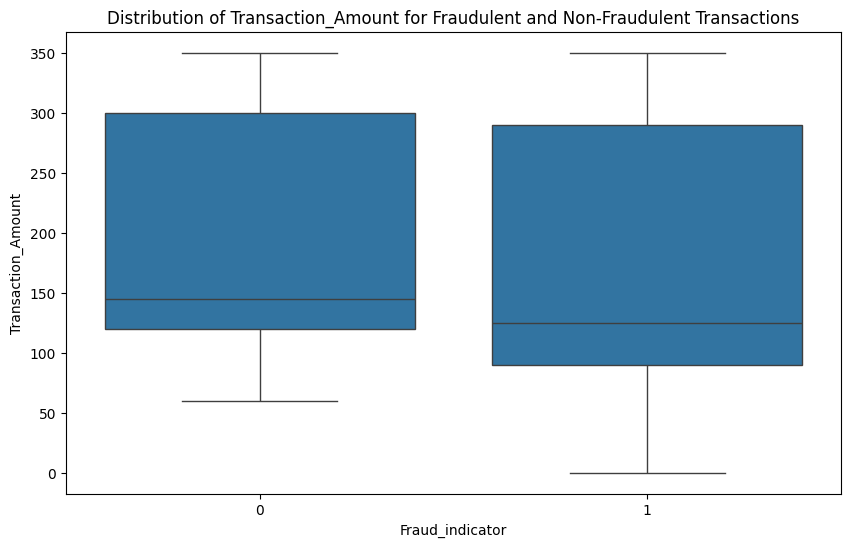

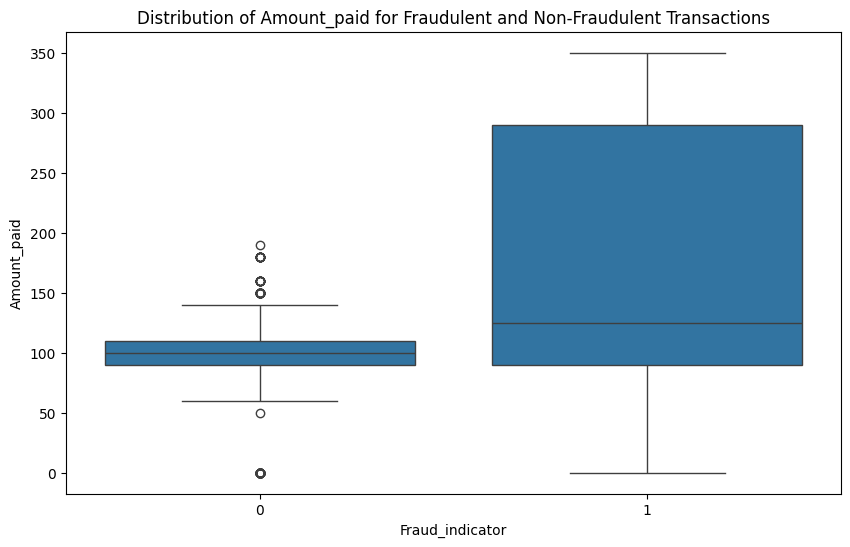

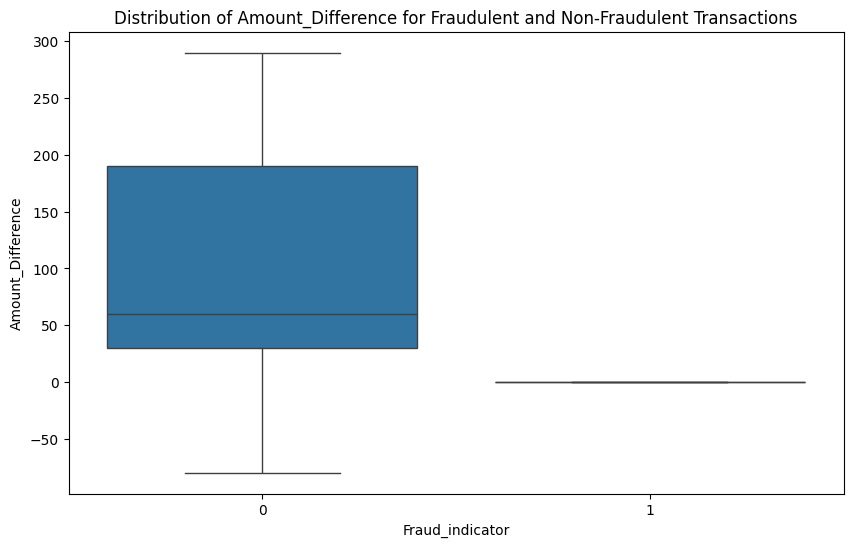

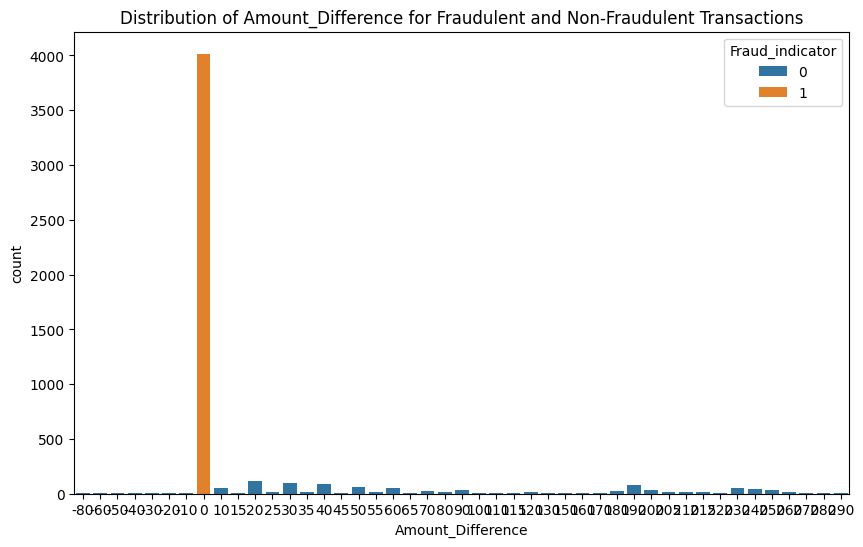

In [ ]:
numeric_features=['Transaction_Amount','Amount_paid','Amount_Difference']
# Box plots or violin plots for numerical features
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Fraud_indicator', y=feature, data=data)
    plt.title(f'Distribution of {feature} for Fraudulent and Non-Fraudulent Transactions')
    plt.show()

# Count plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='Fraud_indicator', data=data)
    plt.title(f'Distribution of {feature} for Fraudulent and Non-Fraudulent Transactions')
    plt.show()

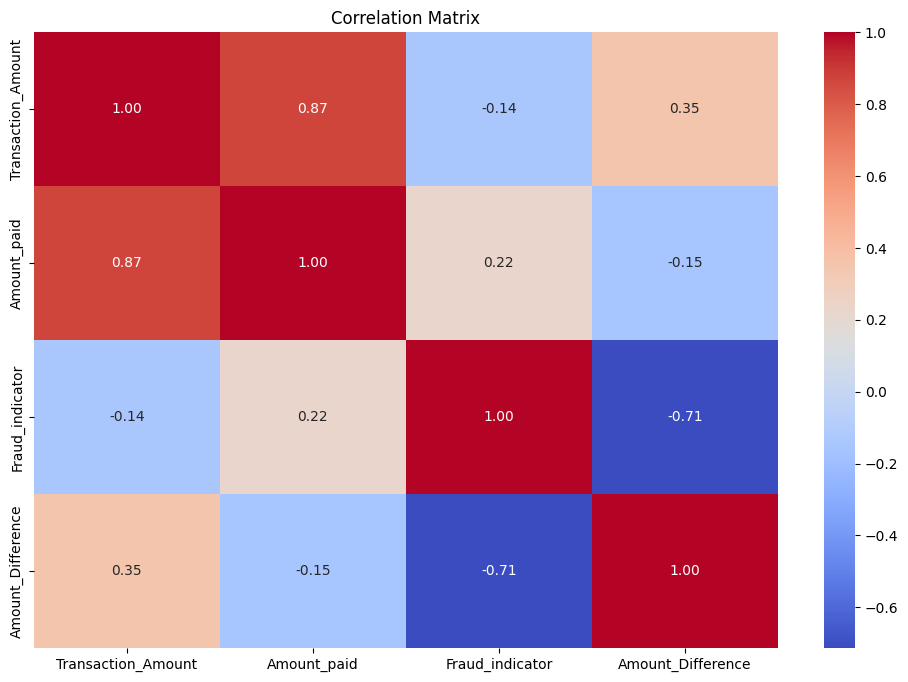

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()

# Heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()